# Linear regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## Steps to implement Linear Regression
Here are the steps to implement Linear Regression algorithm:
- Import Dataset
- Data Preprocessing
- Fitting Simple Linear Regression to the Training set
- Predicting the Test set results

In [51]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])
df['size'] = label_encoder.fit_transform(df['size'])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,1
1,10.34,1.66,1,0,2,0,2
2,21.01,3.50,1,0,2,0,2
3,23.68,3.31,1,0,2,0,1
4,24.59,3.61,0,0,2,0,3
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,2
240,27.18,2.00,0,1,1,0,1
241,22.67,2.00,1,1,1,0,1
242,17.82,1.75,1,0,1,0,1


<Axes: xlabel='total_bill', ylabel='tip'>

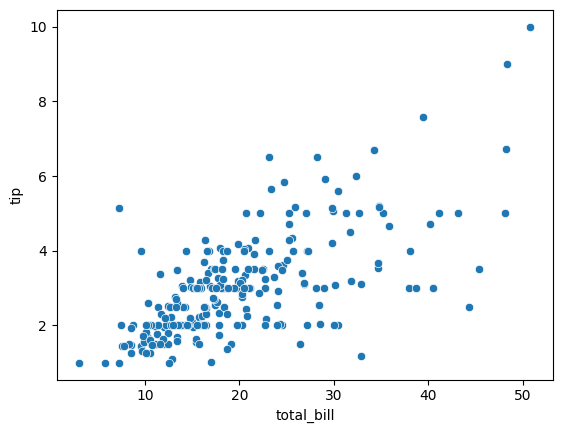

In [55]:
sns.scatterplot(x='total_bill', y="tip", data=df)

<Axes: xlabel='total_bill', ylabel='Count'>

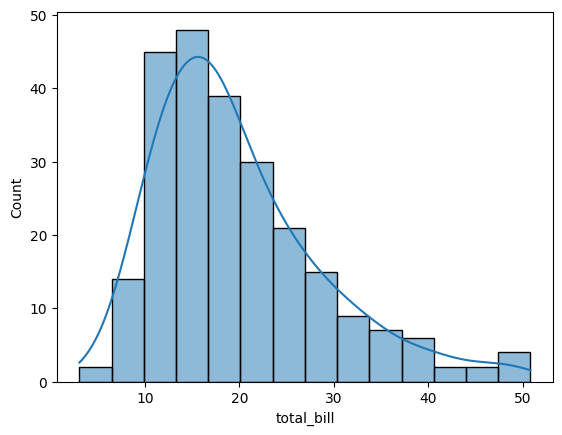

In [56]:
# Check the distribution of Data using histogram
sns.histplot(df['total_bill'], kde=True)

In [57]:
# Scale the data using standard scaler
scaler = MinMaxScaler()
df[['total_bill', 'tip']] = scaler.fit_transform(df[['total_bill', 'tip']])

In [58]:
# Split the data into X and y
X = df[['total_bill']]
y = df['tip']

In [59]:
# Split the data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# Call and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# predict
y_pred = model.predict(X_test)

In [62]:
# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.018576821423356437
R2 Score: 0.43900454076664264
RMSE: 0.1362968136948052


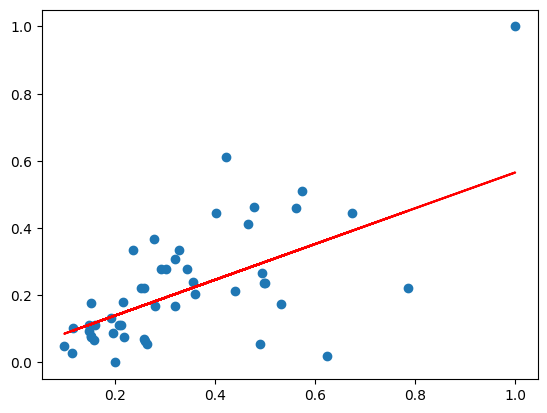

In [63]:
# Plot the model and the data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()